# DJ Pelletier
### COS 184 fall 2020

## Lab 7: Acquiring data (15 points)

This assignment is about selectively reading data from a file into a <code>numpy ndarray</code> and doing some interesting things with it.

The file <code>'Maine_Population_1960-2010_by_Counties.csv'</code> contains information about the total population of each county in Maine in the years 1960, 1970, 1980, 1990, 2000 and 2010. The first line of the file, which we will ignore, contains column labels:

<code>County,"Total Population, 1960","Total Population, 1970","Total Population, 1980","Total Population, 1990","Total Population, 2000","Total Population, 2010",Location</code>

The second and subsequent lines contain the county name, the population data and the latitude and longitude:

<code>"Androscoggin County, Maine",86312,91279,99509,105259,103793,107702,"(44.1970089, -70.2376963)"</code>

For our purposes, we need an array of populations. Each row will correspond to a county; each column to a year. We don't need the location data at all. We also need a list of just the county names (e.g., <code>'Androscoggin'</code>). First, let's read the file and make the list of county names <code>counties</code>. You can do this with Python text file reading, as we have used before, or with <code>numpy</code>'s <code>genfromtxt()</code> to get an <code>ndarray</code>.

In [21]:
import numpy as np
# Your code to read the file and create the counties list (or ndarray) goes here. If you're working in Python, drop
# the leading ", split the line on the first blank and append to counties. If you're working in numpy, be sure to use
# a converter for the first column.

counties = []

with open("Maine_Population_1960-2010_by_Counties.csv", "r") as f:
    for line in f:
        currentline = line.split(",")
        if (currentline[0] != "County"):
            counties.append(currentline[0][1:-7])

print(counties)

['Androscoggin', 'Aroostook', 'Cumberland', 'Franklin', 'Hancock', 'Kennebec', 'Knox', 'Lincoln', 'Oxford', 'Penobscot', 'Piscataquis', 'Sagadahoc', 'Somerset', 'Waldo', 'Washington', 'York']


In [22]:
# Code check block.
assert len(counties) == 16
assert counties[-1] == 'York'

Now we're going to read the file again, this time to create the <code>ndarray populations</code>. Now we're definitely going to use the <code>numpy</code> function <code>genfromtxt()</code>. The detailed descripion of this function is at https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt. 
<ul>
   <li>We have to ignore the first line of the file, so you'll want to set the <code>skip_header</code> argument to 1.    <li>We want the datatype of values in the array to be <code>'int32'</code> rather than the default.
   <li>We want the delimiter to be <code>','</code>.
   <li>We want to read only columns 1-6, ignoring the first (the county) and last (the location). (Hack) Because of the comma in the county name, it counts as two columns, so only include columns 2-7.
</ul>

In [32]:
import numpy as np
# Your code to create the new ndarray populations goes here.

populations = np.genfromtxt("Maine_Population_1960-2010_by_Counties.csv", dtype='int32', delimiter=',', skip_header=1, usecols=range(2,8))

print(populations)

[[ 86312  91279  99509 105259 103793 107702]
 [106064  94078  91344  86936  73938  71870]
 [182751 192528 215789 243135 265612 281674]
 [ 20069  22444  27447  29008  29467  30768]
 [ 32293  34590  41781  46948  51791  54418]
 [ 89150  95306 109889 115904 117114 122151]
 [ 28575  29013  32941  36310  39618  39736]
 [ 18497  20537  25691  30357  33616  34457]
 [ 44345  43457  49043  52602  54755  57833]
 [126346 125393 137015 146601 144919 153923]
 [ 17379  16285  17634  18653  17235  17535]
 [ 22793  23452  28795  33535  35214  35293]
 [ 39749  40597  45049  49767  50888  52228]
 [ 22632  23328  28414  33018  36280  38786]
 [ 32908  29859  34963  35308  33941  32856]
 [ 99402 111576 139739 164587 186742 197131]]


In [33]:
# Code check block.
assert populations.shape == (16, 6)
assert populations.dtype == 'int32'
assert populations[15,5] == 197131

What counties grew in population from 1960 to 2010? What counties lost? You can do this by comparing the population in each county in 2010 with that in 1960. If the difference is positive then that county is a gainer; otherwise it's a loser. Note that <code>counties[i]</code> is the name of the county for <code>populations[i]</code>.

In [39]:
# Your code to add counties to either the gainers list or the losers list goes here.

gainers = []
losers = []

for i in range(len(populations)):
    if (populations[i][-1] - populations[i][0] >= 0):
        gainers.append(counties[i])
    else:
        losers.append(counties[i])

# Print the gainers and losers, by county name.

print("Gainers: " + str(gainers))
print("Losers: " + str(losers))

Gainers: ['Androscoggin', 'Cumberland', 'Franklin', 'Hancock', 'Kennebec', 'Knox', 'Lincoln', 'Oxford', 'Penobscot', 'Piscataquis', 'Sagadahoc', 'Somerset', 'Waldo', 'York']
Losers: ['Aroostook', 'Washington']


What else can we do with this data? The cell below plots the total population of Maine by decade.

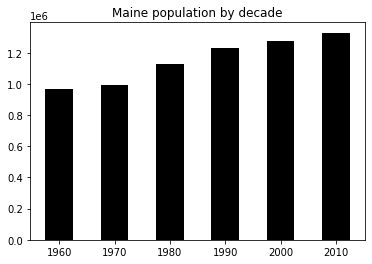

In [42]:
# Don't change this cell.
import pylab as pl
%matplotlib inline
pl.title('Maine population by decade')
pops = [t.sum() for t in populations.T]  # sum of each column
pl.bar(list(range(1960,2020,10)),  # the x axis, from 1950 to 2020
       pops,                       # the population data
       width=5,                    # wider bars (default=0.8)
       color='k',                  # black bars
       align='center',             # center bar on tick mark
       # only label years 1960-2010
       tick_label=[str(t) for t in range(1960,2020,10)]
      )
# the following suppresses automatic output of the last value in a cell.
pass ### As does a semicolon!